In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [39]:
# Load training data from .arff file
train_data, train_meta = arff.loadarff("HouseTwenty_TRAIN.arff")
train_df = pd.DataFrame(train_data)


# Load test data from .arff file
test_data, test_meta = arff.loadarff("HouseTwenty_TEST.arff")
test_df = pd.DataFrame(test_data)



In [41]:
# Convert class labels to integers
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the data to binary format
train_df['target'] = label_encoder.fit_transform(train_df['target'])

test_df['target'] = label_encoder.fit_transform(test_df['target'])

# Separate features and target variable in training data
X_train = train_df.drop(columns=['target']).values
y_train = train_df['target'].values


# Separate features and target variable in test data
X_test = test_df.drop(columns=['target']).values
y_test = test_df['target'].values

#binary_data = data['category_column'].map({'Yes': 1, 'No': 0})

In [31]:
y_train

array([b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1',
       b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'2', b'2',
       b'2', b'2', b'2', b'2', b'2', b'2', b'2', b'2', b'2', b'2', b'2',
       b'2', b'2', b'2', b'2', b'2', b'2', b'2'], dtype=object)

In [7]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)


In [13]:
# Initialize PCA with desired number of components
pca = PCA(n_components=2)


In [15]:
# Fit PCA to the data
pca.fit(X_train)


PCA(n_components=2)

In [16]:
# Extract the feature extraction matrix
feature_extraction_matrix = pca.components_


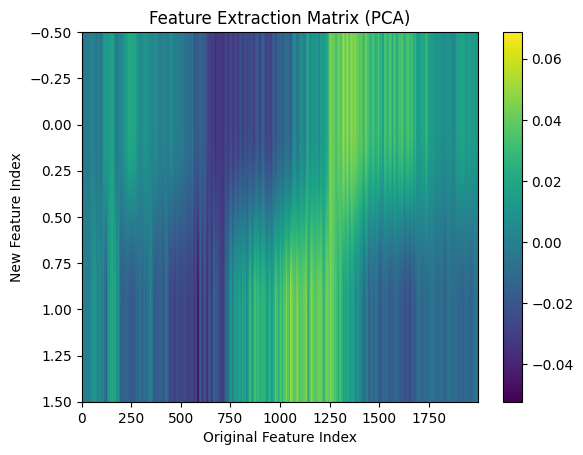

In [18]:
# Plot the feature extraction matrix
plt.imshow(feature_extraction_matrix, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('Original Feature Index')
plt.ylabel('New Feature Index')
plt.title('Feature Extraction Matrix (PCA)')
plt.savefig('PCA_Matrix')
plt.show()

In [26]:
# Initialize the Logistic Regression model
logistic_reg = LogisticRegression()


In [43]:
# Train the Logistic Regression model on the training data
logistic_reg.fit(X_train, y_train)


LogisticRegression()

In [44]:
# Predict the labels of the test set
y_pred = logistic_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7563025210084033
